In [1]:
#Use case: We are building a logistic regression model for itanic Training and Testing datasets to predict the survival rate of people based on various
#factors such as 'PassengerId'	'Survived'	'Pclass'	'Sex'	'Age'	'SibSp'	'Parch'	'Fare'	'Embarked'

# steps:
  # step 1: importing training adn testing dataset into the ipynb file using pandas
  # step 2: combining the datasets as whole using concat function
  # step 3: EDA process 1- visualization, filering, data preprocessing
  # step 4: EDA process 2- model building, and fitting
  # step 5: Accuracy prediction using classification report and confusion report
  # step 6: Deployment of app.py using streamlit


In [52]:
!pip install streamlit

In [3]:
import pandas as pd
df_train=pd.read_csv(r'C:\Users\user\Desktop\20 Assignments\Logistic Regression\Titanic_train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
import pandas as pd
df_test=pd.read_csv(r'C:\Users\user\Desktop\20 Assignments\Logistic Regression\Titanic_test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# dataset concatenation
df = pd.concat([df_train, df_test])             
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df.shape

(1309, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
gender_map={
    'male':0,
    'female':1
}
df['Sex']=df['Sex'].map(gender_map)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [10]:
Embarked_map={
    'S':0,
    'C':1,
    'Q':2
}
df['Embarked']=df['Embarked'].map(Embarked_map)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0.0


In [11]:
df = df.fillna(df.mean(numeric_only=True))
df['Survived'] = df['Survived'].astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,29.881138,0,0,A.5. 3236,8.0500,NaN,0.0
414,1306,0,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,1.0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0
416,1308,0,3,"Ware, Mr. Frederick",0,29.881138,0,0,359309,8.0500,NaN,0.0


In [12]:
df=df.drop(['Cabin','Ticket'],axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,29.881138,0,0,8.0500,0.0
414,1306,0,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,108.9000,1.0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,7.2500,0.0
416,1308,0,3,"Ware, Mr. Frederick",0,29.881138,0,0,8.0500,0.0


In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.261268,2.294882,0.355997,29.881138,0.498854,0.385027,33.295479,0.394797
std,378.020061,0.439494,0.837836,0.478997,12.883193,1.041658,0.865560,51.738879,0.653317
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,0.000000,29.881138,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000


In [15]:
z=df.corr(numeric_only=True)
z

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.331493,-0.038354,-0.013406,0.025731,-0.055224,0.008942,0.031416,0.039643
Survived,-0.331493,1.000000,-0.244686,0.404020,-0.060203,-0.014375,0.054908,0.173630,0.049975
Pclass,-0.038354,-0.244686,1.000000,-0.124617,-0.366371,0.060832,0.018322,-0.558477,0.037458
Sex,-0.013406,0.404020,-0.124617,1.000000,-0.057397,0.109609,0.213125,0.185484,0.121699
Age,0.025731,-0.060203,-0.366371,-0.057397,1.000000,-0.190747,-0.130872,0.171521,0.037277
SibSp,-0.055224,-0.014375,0.060832,0.109609,-0.190747,1.000000,0.373587,0.160224,-0.073924
Parch,0.008942,0.054908,0.018322,0.213125,-0.130872,0.373587,1.000000,0.221522,-0.095961
Fare,0.031416,0.173630,-0.558477,0.185484,0.171521,0.160224,0.221522,1.000000,0.061969
Embarked,0.039643,0.049975,0.037458,0.121699,0.037277,-0.073924,-0.095961,0.061969,1.000000


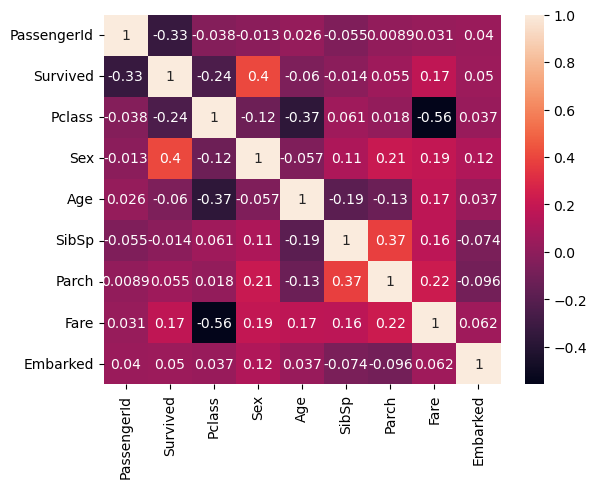

In [16]:
import seaborn as sns           # visualization of the dataset
import matplotlib.pyplot as plt
sns.heatmap(z, annot=True)
plt.show()

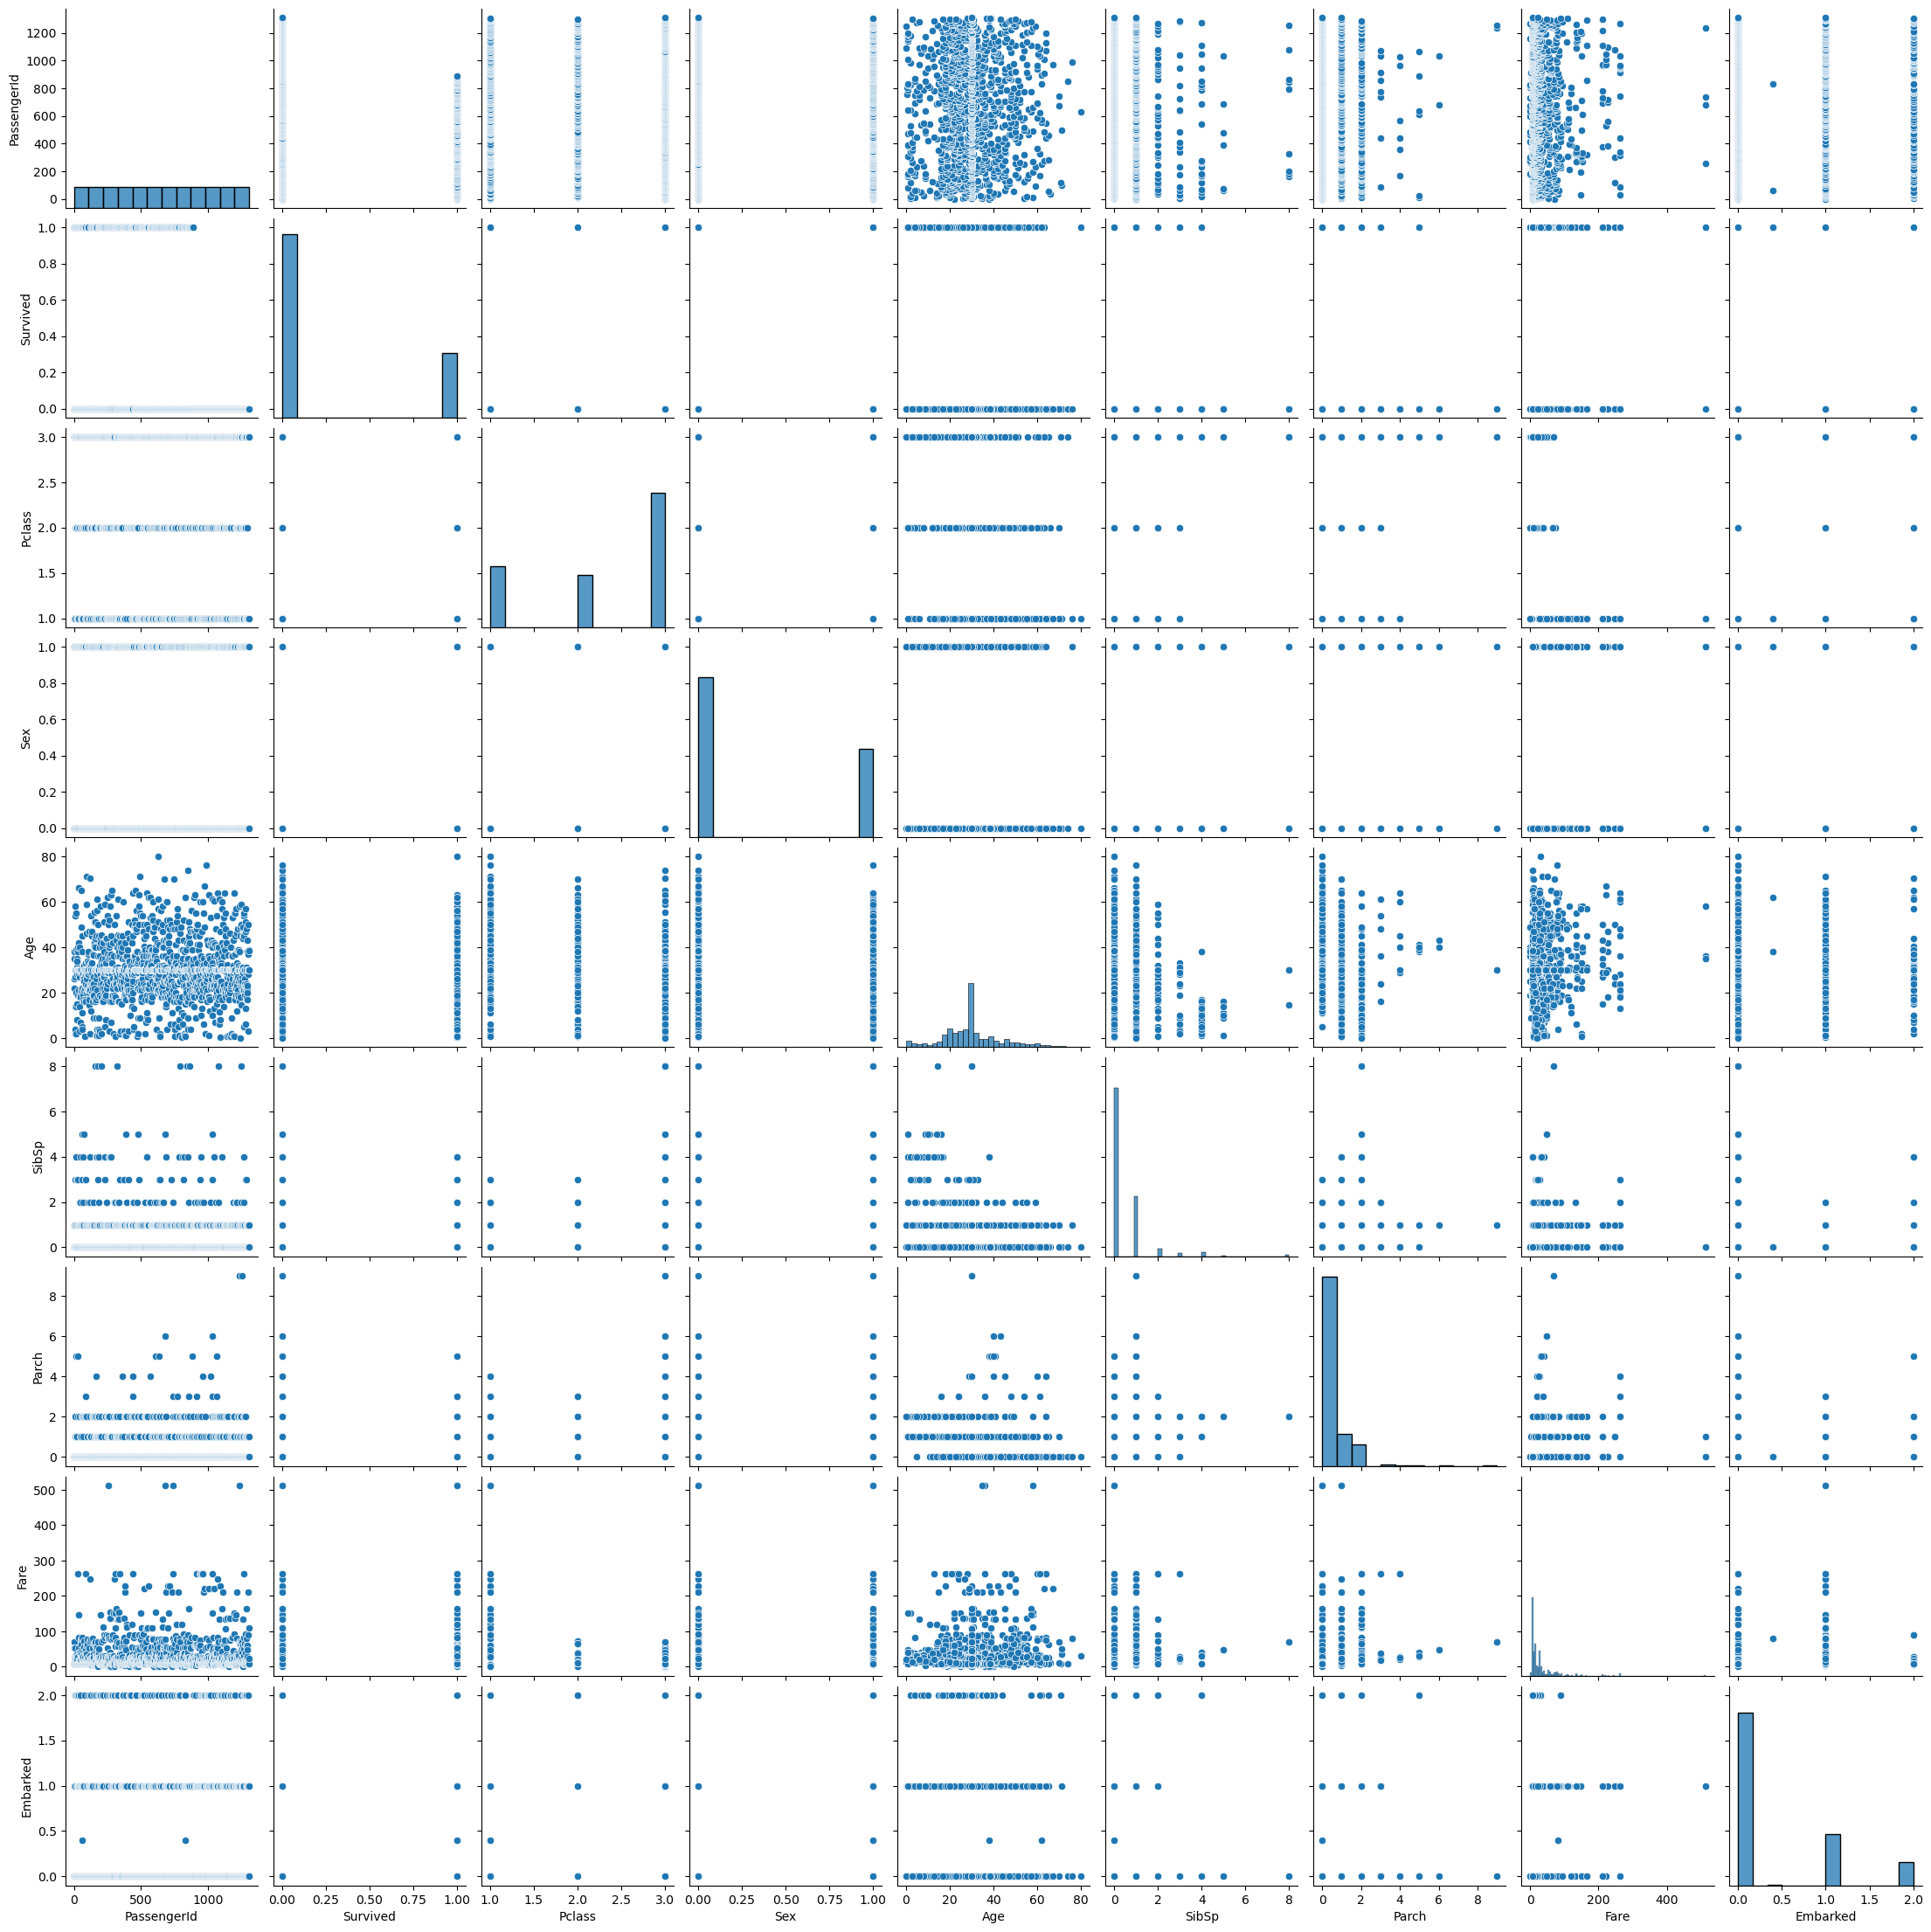

In [17]:
sns.pairplot(df)
plt.show()

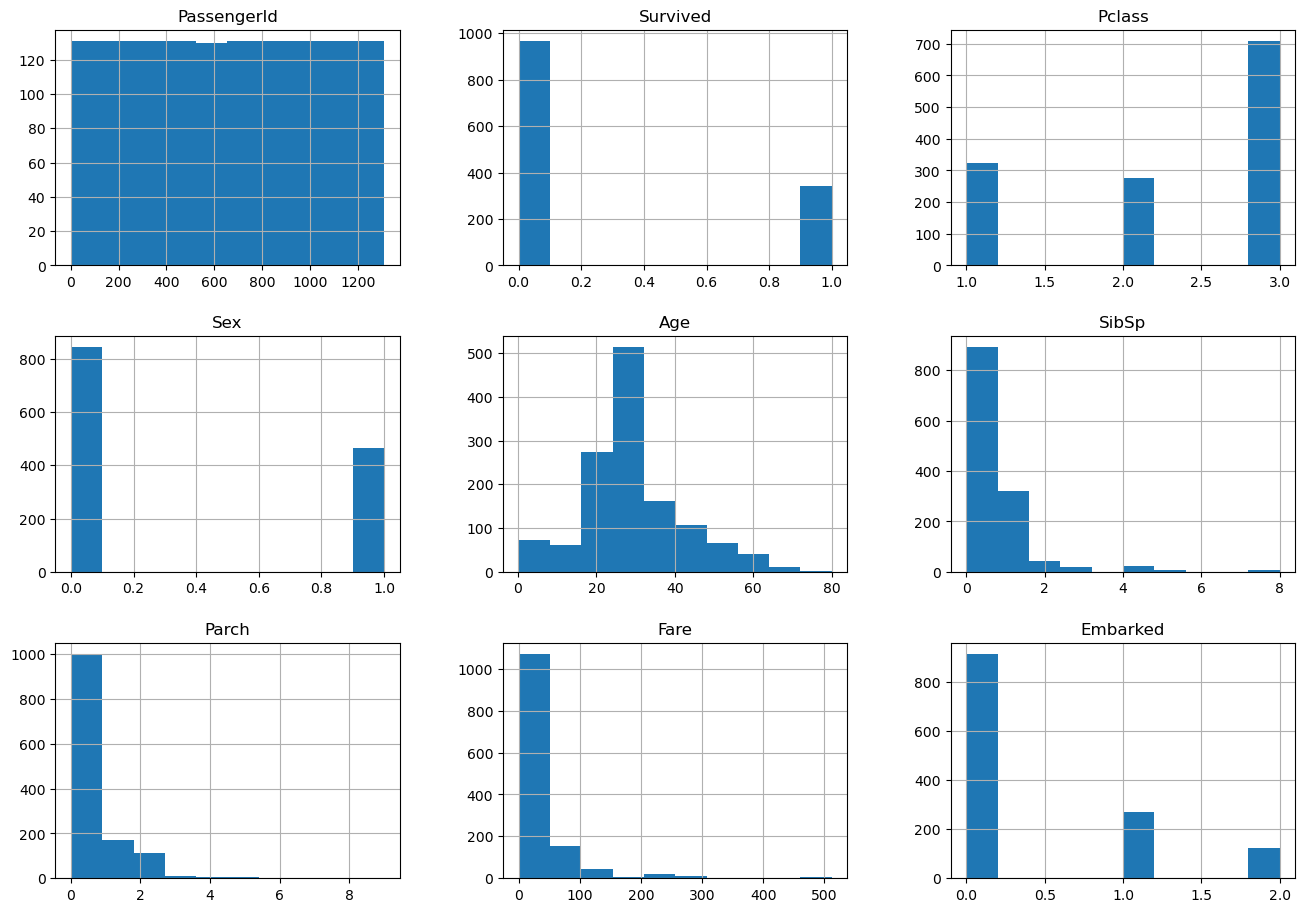

In [18]:
import matplotlib.pyplot as plt
df.hist(figsize=(16,15), layout=(4,3))
plt.show()

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0.0


In [20]:
df=df.drop(['Name'],axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0.0
1,2,1,1,1,38.000000,1,0,71.2833,1.0
2,3,1,3,1,26.000000,0,0,7.9250,0.0
3,4,1,1,1,35.000000,1,0,53.1000,0.0
4,5,0,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,29.881138,0,0,8.0500,0.0
414,1306,0,1,1,39.000000,0,0,108.9000,1.0
415,1307,0,3,0,38.500000,0,0,7.2500,0.0
416,1308,0,3,0,29.881138,0,0,8.0500,0.0


In [21]:
x=df.drop(['Survived'],axis=1)                                     # variable declaration
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.000000,1,0,7.2500,0.0
1,2,1,1,38.000000,1,0,71.2833,1.0
2,3,3,1,26.000000,0,0,7.9250,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0
4,5,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
413,1305,3,0,29.881138,0,0,8.0500,0.0
414,1306,1,1,39.000000,0,0,108.9000,1.0
415,1307,3,0,38.500000,0,0,7.2500,0.0
416,1308,3,0,29.881138,0,0,8.0500,0.0


In [22]:
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: Survived, Length: 1309, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.77, random_state=23)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1007, 8)
(302, 8)
(1007,)
(302,)


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# mdoel building
lr=LogisticRegression()
lr.fit(x_train,y_train)                                     

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred=lr.predict(x_train)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       744
           1       0.78      0.57      0.65       263

    accuracy                           0.84      1007
   macro avg       0.82      0.75      0.78      1007
weighted avg       0.84      0.84      0.84      1007



In [30]:
y_pred1=lr.predict(x_test)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [31]:
# classification reprot
print(classification_report(y_test,y_pred1))                   

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       223
           1       0.77      0.54      0.64        79

    accuracy                           0.84       302
   macro avg       0.81      0.74      0.77       302
weighted avg       0.83      0.84      0.83       302



In [32]:
print(confusion_matrix(y_test,y_pred1))

[[210  13]
 [ 36  43]]


In [33]:
# Conclusion: we have an accuracy of 84% which is an excellent model to implement for the data prediction and

In [34]:
# implementing ROC_AUC-curve to identify the ROC_AUC-score
from sklearn.metrics import roc_curve, roc_auc_score          

In [35]:
y_pred_proba = lr.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

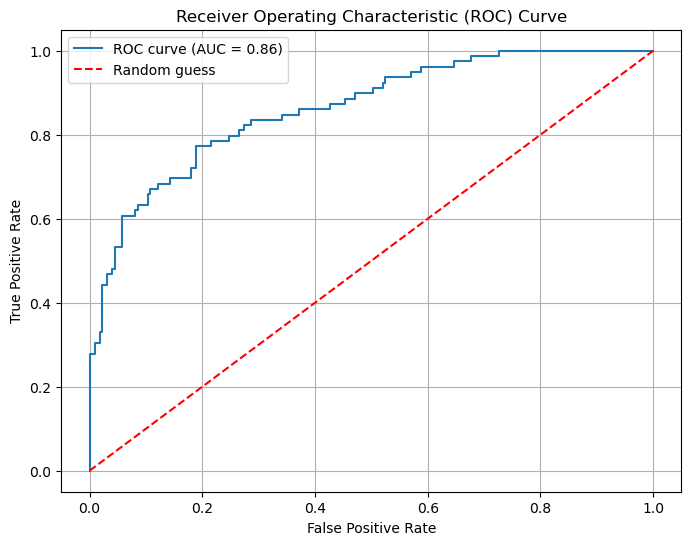

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
print(f'ROC AUC Score: {auc:.2f}')

ROC AUC Score: 0.86


In [38]:
# save as pickel file

import pickle

# Save the trained model as a pickle file
with open('logistic_regression_model.pkl', 'wb') as f:
  pickle.dump(lr, f)

print("Model saved as logistic_regression_model.pkl")

Model saved as logistic_regression_model.pkl


In [39]:
import streamlit as st
import pickle
import numpy as np

In [40]:
# Load the trained model
with open("logistic_regression_model.pkl", "rb") as file:
    model = pickle.load(file)

In [41]:
# Title
st.title("Term Deposit Prediction")

2025-07-22 09:17:01.955 
  command:

    streamlit run C:\Users\user\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [42]:
# Input fields
age = st.number_input("Enter Age", min_value=18, max_value=100, step=1)
balance = st.number_input("Enter Account Balance", min_value=-5000, max_value=100000, step=100)
duration = st.number_input("Enter Call Duration", min_value=0, max_value=5000, step=1)

2025-07-22 09:17:01.978 Session state does not function when running a script without `streamlit run`


In [43]:
# Prediction button
if st.button("Predict"):
    features = np.array([[age, balance, duration]])
    prediction = model.predict(features)
    result = "Subscribed" if prediction[0] == 1 else "Not Subscribed"
    st.write(f"Prediction: **{result}**")

In [45]:
#save the app as app.py

%%writefile app.py
import pandas as pd                                               # datset importing
import pandas as pd
import seaborn as sns                                              # visualization of the dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score          # implementing ROC_AUC-curve to identify the ROC_AUC-score
import pickle
import streamlit as st
import numpy as np

# Load the trained model
with open("logistic_regression_model.pkl", "rb") as file:
  model = pickle.load(file)
st.title("Titanic Survival Prediction")


pclass = st.selectbox("Select Pclass", [1, 2, 3])
sex = st.selectbox("Select Sex", ["male", "female"])
age = st.number_input("Enter Age", min_value=0, max_value=100, step=1)
sibsp = st.number_input("Enter number of Siblings/Spouses Aboard", min_value=0, step=1)
parch = st.number_input("Enter number of Parents/Children Aboard", min_value=0, step=1)
fare = st.number_input("Enter Fare", min_value=0.0, step=0.01)
embarked = st.selectbox("Select Embarked Port", ["S", "C", "Q"])


# Mapping categorical inputs
sex_map={
    'male':0,
    'female':1
}
embarked_map={
    'S':0,
    'C':1,
    'Q':2
}

# Prediction button
if st.button("Predict Survival"):
  sex_encoded = sex_map[sex]
  embarked_encoded = embarked_map[embarked]

  # Create a DataFrame matching the training data columns (excluding Survived, Cabin, Ticket, Name)
  features = pd.DataFrame([[passenger_id, pclass, sex_encoded, age, sibsp, parch, fare, embarked_encoded]],
                           columns=['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

  # Handle potential missing values if the model was trained to handle them
  features = features.fillna(features.mean(numeric_only=True))

  prediction = model.predict(features)
  prediction_proba = model.predict_proba(features)[:, 1] # Probability of survival

  result = "Survived" if prediction[0] == 1 else "Did not Survive"
  st.write(f"Prediction: **{result}**")
  st.write(f"Probability of Survival: **{prediction_proba[0]:.2f}**")

UsageError: Line magic function `%%writefile` not found.


In [47]:
!streamlit run app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
'npx' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
#Use case: We are building a logistic regression model for itanic Training and Testing datasets to predict the survival rate of people based on various
#factors such as 'PassengerId'	'Survived'	'Pclass'	'Sex'	'Age'	'SibSp'	'Parch'	'Fare'	'Embarked'

# steps:
  # step 1: importing training adn testing dataset into the ipynb file using pandas
  # step 2: combining the datasets as whole using concat function
  # step 3: EDA process 1- visualization, filering, data preprocessing
  # step 4: EDA process 2- model building, and fitting
  # step 5: Accuracy prediction using classification report and confusion report

In [ ]:
### 3) Interview Q (short answers):
- ##**Precision vs Recall:** Precision = TP / (TP + FP) — among predicted positives, how many are truly positive. Recall = TP / (TP + FN) — among actual positives, how many did we detect.  
-##**Cross-validation:** Repeatedly train/test on different splits to get stable estimate of model performance and avoid overfitting. Important for binary classification to evaluate how model generalizes.
